# Task 11
---

In [12]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("Solarize_Light2")

from utils import avg_vel
from main import tau_simulation

In [3]:
particle_1 = {
        "r": 12e-9,
        "L": 20e-6,
        "alpha": 0.2,
        "eta": 1e-3,
        "kbt": 26 * 1.60e-22,
        "delta_u": 80 * 1.60e-19,
    }
particle_2 = {
        "r": 3*12e-9,
        "L": 20e-6,
        "alpha": 0.2,
        "eta": 1e-3,
        "kbt": 26 * 1.60e-22,
        "delta_u": 80 * 1.60e-19,
    }

In [35]:
nc_list[0]

{'gamma': 6.785840131753953e-10,
 'omega': 47.15702017537639,
 'D': 0.000325,
 'dt': 0.0125,
 'N_steps': 18862}

In [19]:
avg_pos_p, nc_list_p, last_pos_p = np.load("simulations/avg_pos_N_1000.npy", allow_pickle=True)

In [21]:
tau = np.linspace(0.001, 15, 50) # list of freqs
N = 1000

In [22]:
avg_pos, nc_list, last_steps = tau_simulation(particle_2 ,N, tau, True)

{'r': 3.6e-08, 'L': 2e-05, 'alpha': 0.2, 'eta': 0.001, 'kbt': 4.16e-21, 'delta_u': 1.28e-17}
gamma: 6.785840131753953e-10, 	omega: 47.15702017537639,	 D: 0.000325
dt: 0.0125, 	 N_steps: [18862, 18862, 18862, 18862, 18862, 18862, 20797, 24261, 27726, 31190, 34654, 38119, 41583, 45048, 48512, 51976, 55441, 58905, 62369, 65834, 69298, 72763, 76227, 79691, 83156, 86620, 90084, 93549, 97013, 100477, 103942, 107406, 110871, 114335, 117799, 121264, 124728, 128192, 131657, 135121, 138585, 142050, 145514, 148979, 152443, 155907, 159372, 162836, 166300, 169765]
Loop took 1.6496152877807617s. Loop number: 0
Loop took 1.7672479152679443s. Loop number: 1
Loop took 1.6805336475372314s. Loop number: 2
Loop took 1.7941789627075195s. Loop number: 3
Loop took 1.7613177299499512s. Loop number: 4
Loop took 1.753312110900879s. Loop number: 5
Loop took 1.8470590114593506s. Loop number: 6
Loop took 2.2130837440490723s. Loop number: 7
Loop took 2.6698615550994873s. Loop number: 8
Loop took 3.1086618900299072s

In [25]:
np.save("simulations/avg_drift_r2", [avg_pos, nc_list, last_steps, tau])

In [23]:
mt = [n['dt'] * n['N_steps'] / n['omega'] for n in nc_list]  # Max_time for each simulation
avg_velocities = [avg_vel(1e6*av*particle_1['L'], mt[i]) for i,av in enumerate(avg_pos)]

In [28]:
mt_p = [n['dt'] * n['N_steps'] / n['omega'] for n in nc_list_p]  # Max_time for each simulation
avg_velocities_p = [avg_vel(1e6*av*particle_1['L'], mt_p[i] * 3) for i,av in enumerate(avg_pos_p)]
tau_p = np.linspace(0.001, 5, 50)*3

(array([-0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75]),
 <a list of 9 Text yticklabel objects>)

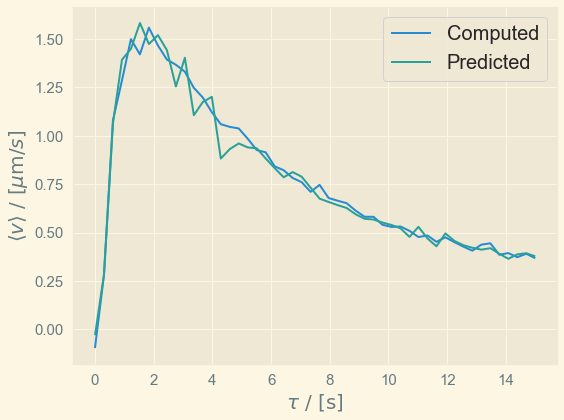

In [30]:
fig = plt.figure(figsize=(8, 6), tight_layout=True)
plt.plot(tau ,avg_velocities, label = "Computed")
plt.plot(tau_p, avg_velocities_p,  label="Predicted")
plt.legend(loc ='best', fontsize=20)
plt.ylabel(fr"$\langle v\rangle\ / \ [\mu\mathrm{{m}} / s]$", size = 20)
plt.xlabel(fr"$\tau\ /\ [\mathrm{{s}}]$", size = 20)
plt.xticks(size =15)
plt.yticks(size =15)
# plt.savefig("img/average_drift_r2.png", facecolor=fig.get_facecolor())

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Change in time scale')

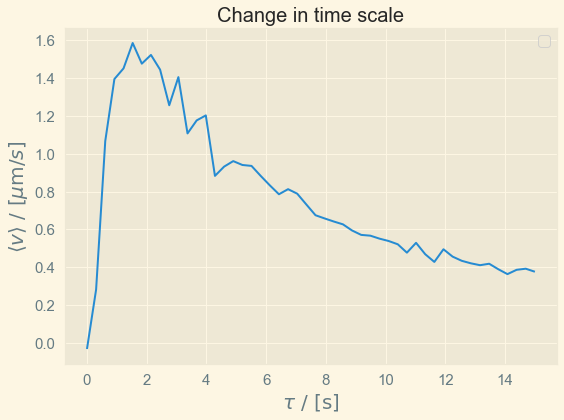

In [14]:

fig = plt.figure(figsize=(8, 6), tight_layout=True)
plt.plot(tau * 3 ,avg_velocities)
plt.legend(loc ='best', fontsize=15)
plt.ylabel(fr"$\langle v\rangle\ / \ [\mu\mathrm{{m}} / s]$", size = 20)
plt.xlabel(fr"$\tau\ /\ [\mathrm{{s}}]$", size = 20)
plt.xticks(size =15)
plt.yticks(size =15)
plt.title("Change in time scale", size=20)